Archivos cargados exitosamente.

--- ANÁLISIS EXPLORATORIO DE DATOS (EDA) para RG_completo_renombrado.csv ---

**1.1 Información General y Primeras Filas:**
Primeras 5 filas del dataset:
   anio  temp_max  temp_min  temp_media  lluvia_mm  dias_nieve        toh  \
0  2009      16.5       6.2        11.3       13.7           0  53.052414   
1  2009      16.0       5.1        10.3       38.4           0  54.363991   
2  2009      13.9       4.3         8.9       20.7           0  49.851257   
3  2009       9.4       2.5         5.8       59.8           0  52.861046   
4  2009       6.3      -1.2         2.1       11.4           1  55.200863   

         top  ent_san_sebastian  aero_ush  ...  mes_diciembre  mes_enero  \
0  34.955265            35474.0   33589.0  ...          False       True   
1  36.912571            26952.0   31671.0  ...          False      False   
2  34.294098            19468.0   20569.0  ...          False      False   
3  36.611073            15952.0   15312.0  ...

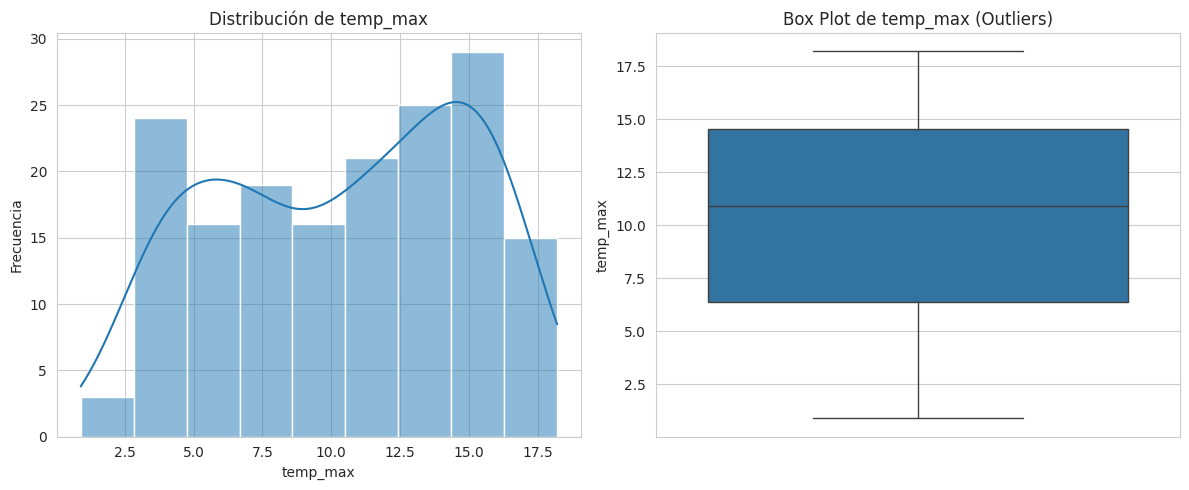

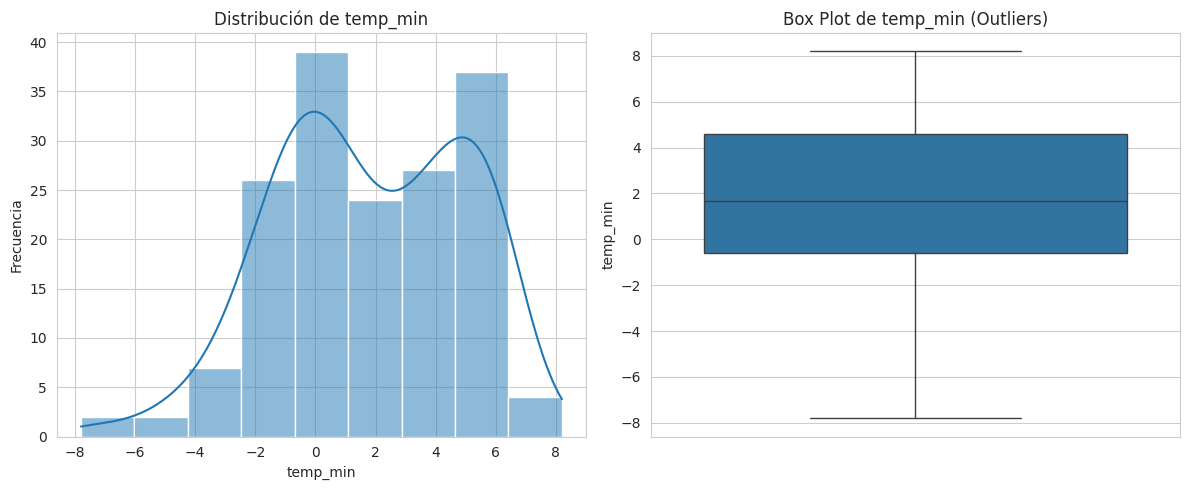

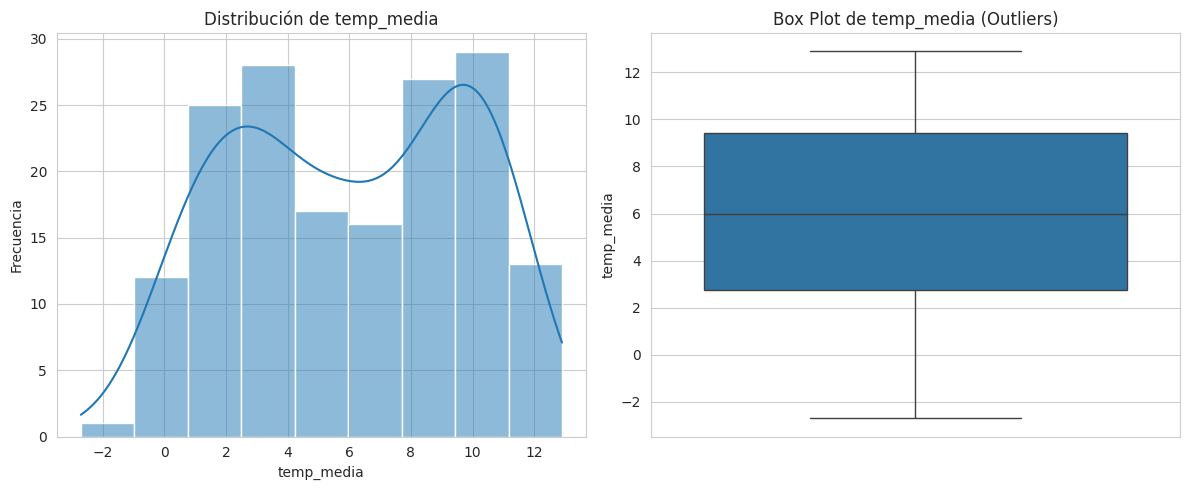

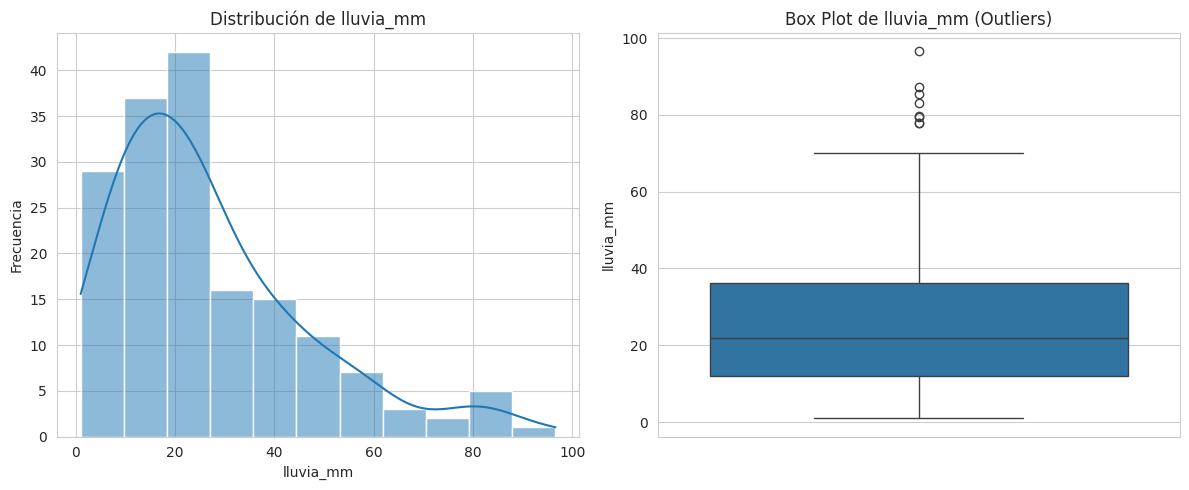

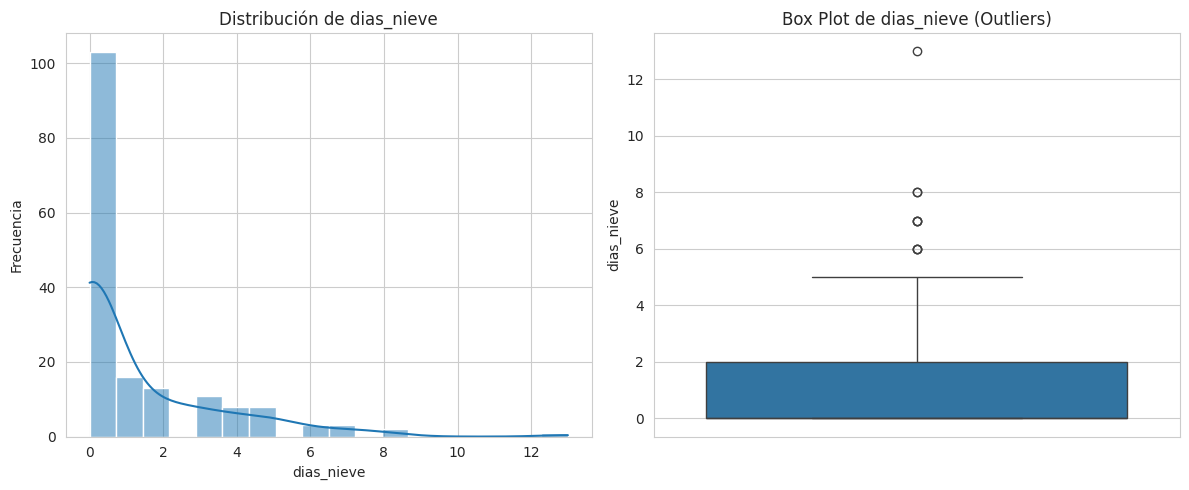

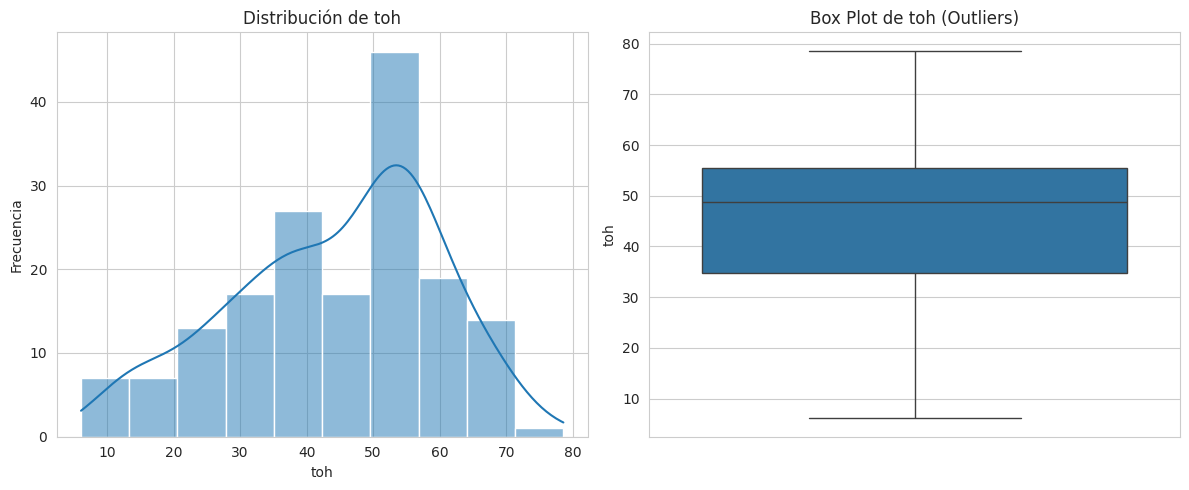

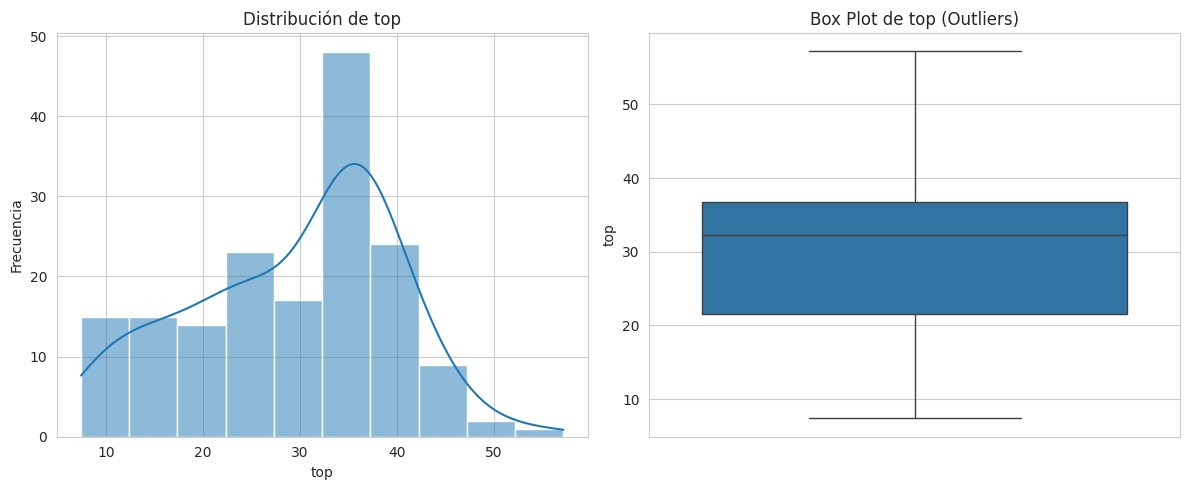

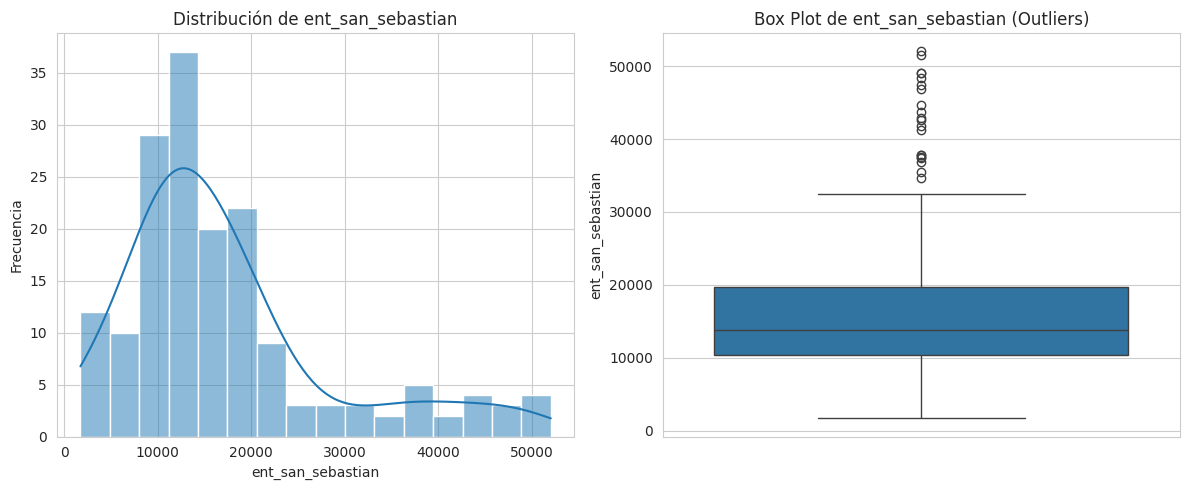

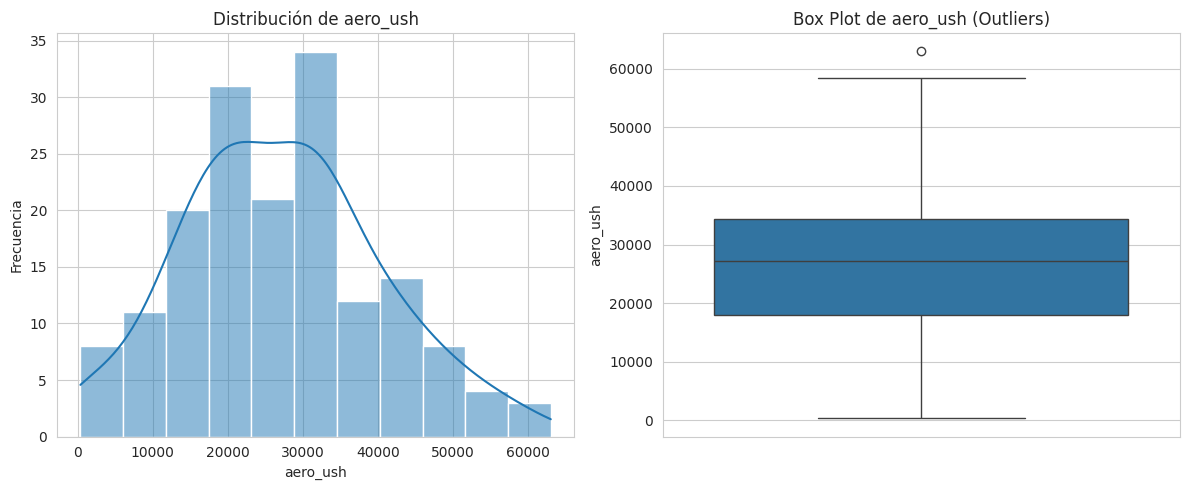

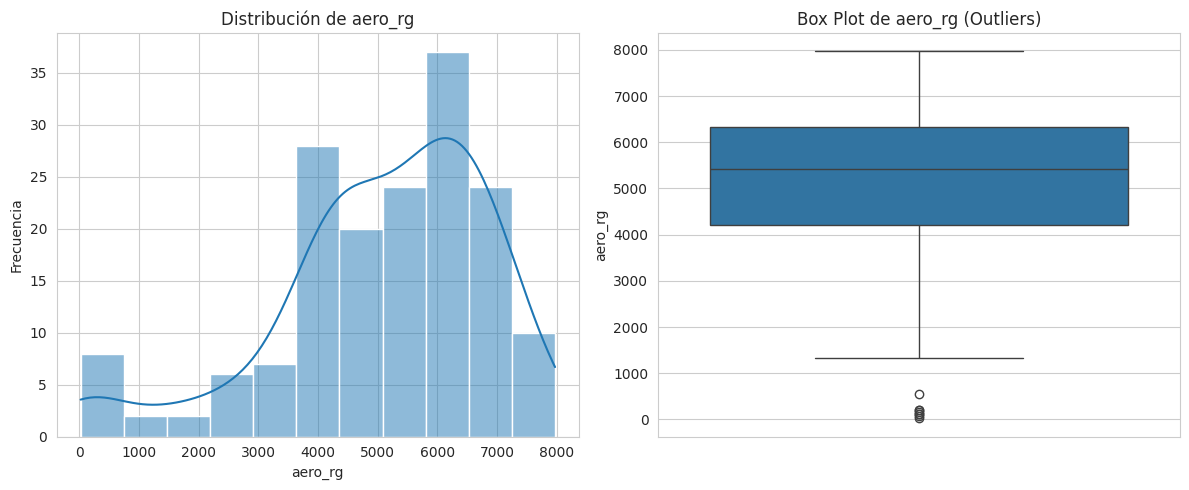


**1.4 Matriz de Correlación entre Variables Numéricas:**


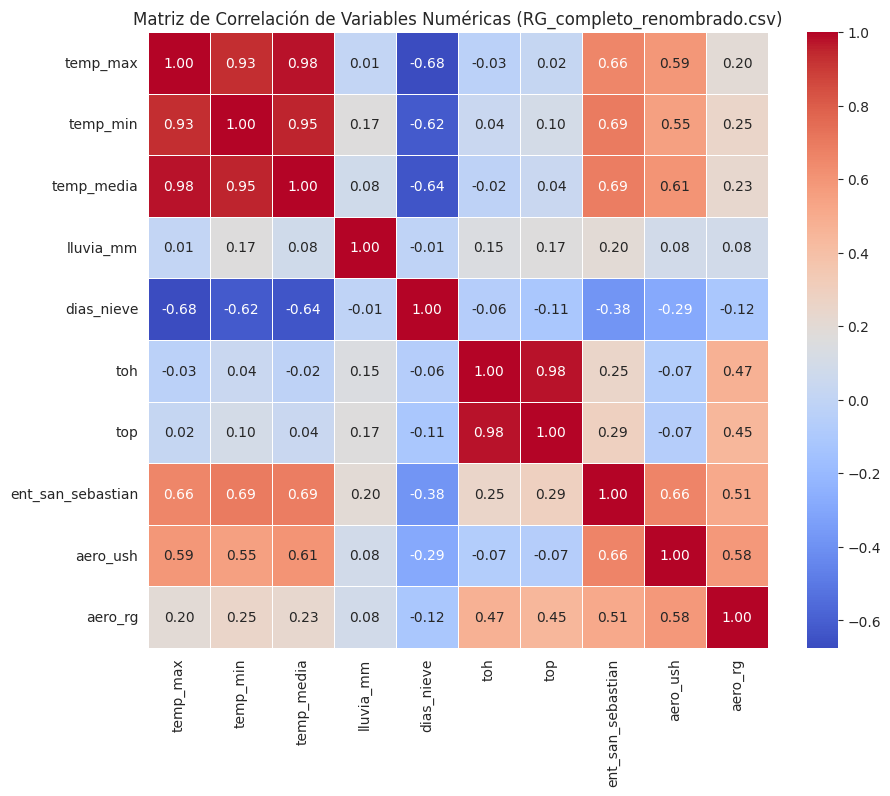


--- ANÁLISIS EXPLORATORIO DE DATOS (EDA) para USH_completo_renombrado.csv ---

**2.1 Información General y Primeras Filas:**
Primeras 5 filas del dataset:
   anio  temp_max  temp_min  temp_media  lluvia_mm  dias_nieve   toh   top  \
0  2009      10.8       9.4        10.1       30.8           0  66.1  56.0   
1  2009       9.5       8.3         8.9       29.0           0  54.5  45.0   
2  2009       9.1       7.9         8.5       64.6           1  39.2  30.7   
3  2009       6.1       5.2         5.7       86.2           1  31.5  24.3   
4  2009       4.7       2.0         2.6       59.2           4  22.1  16.5   

   ent_san_sebastian  aero_ush  ...  mes_diciembre  mes_enero  mes_febrero  \
0              26309   33589.0  ...          False       True        False   
1              15123   31671.0  ...          False      False         True   
2              14684   20569.0  ...          False      False        False   
3              13319   15312.0  ...          False      False  

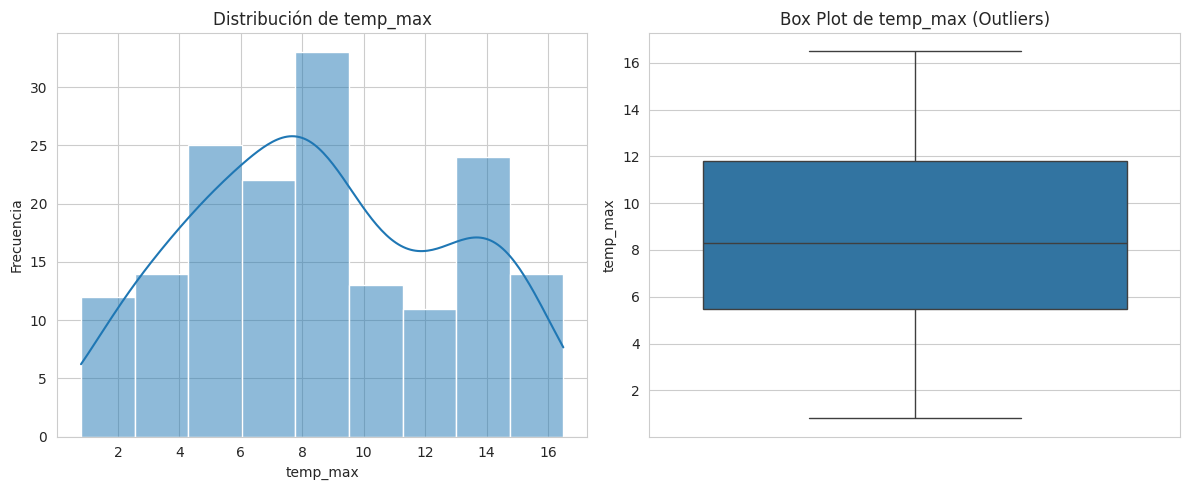

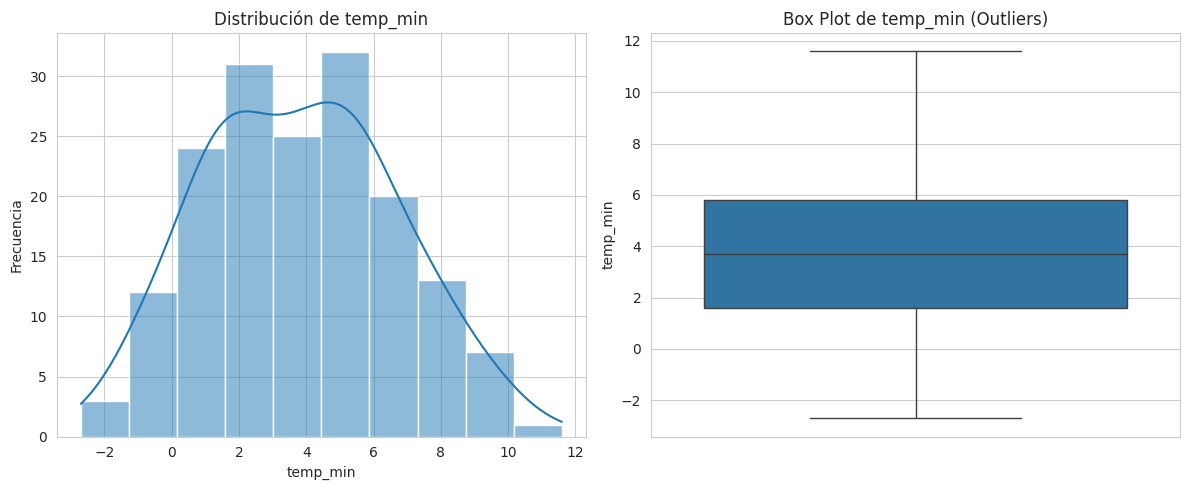

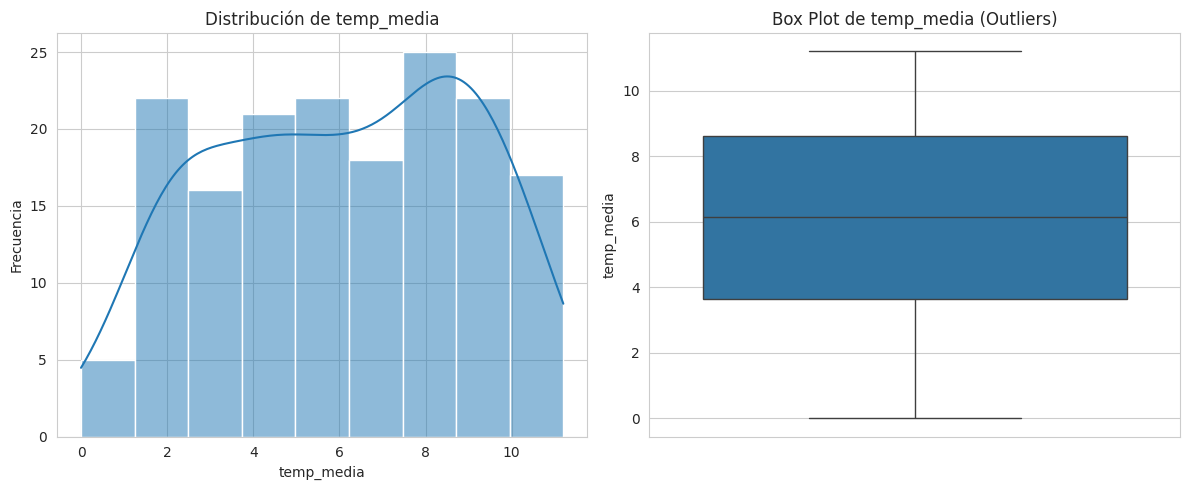

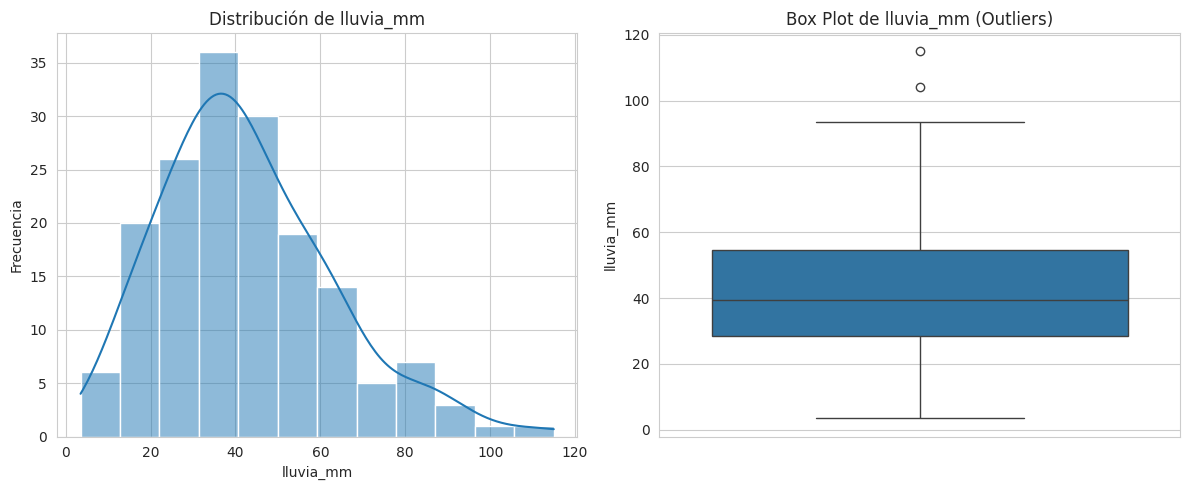

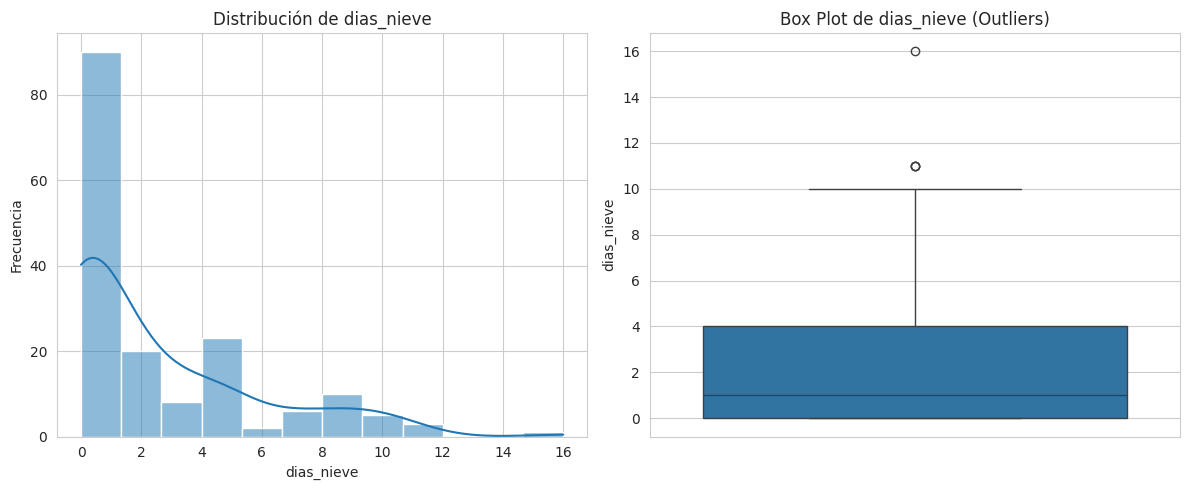

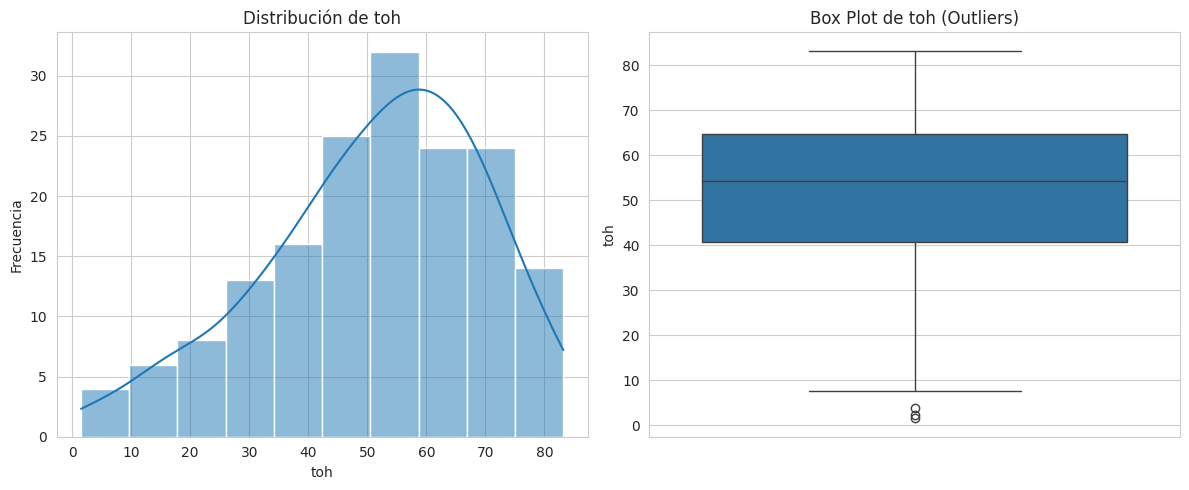

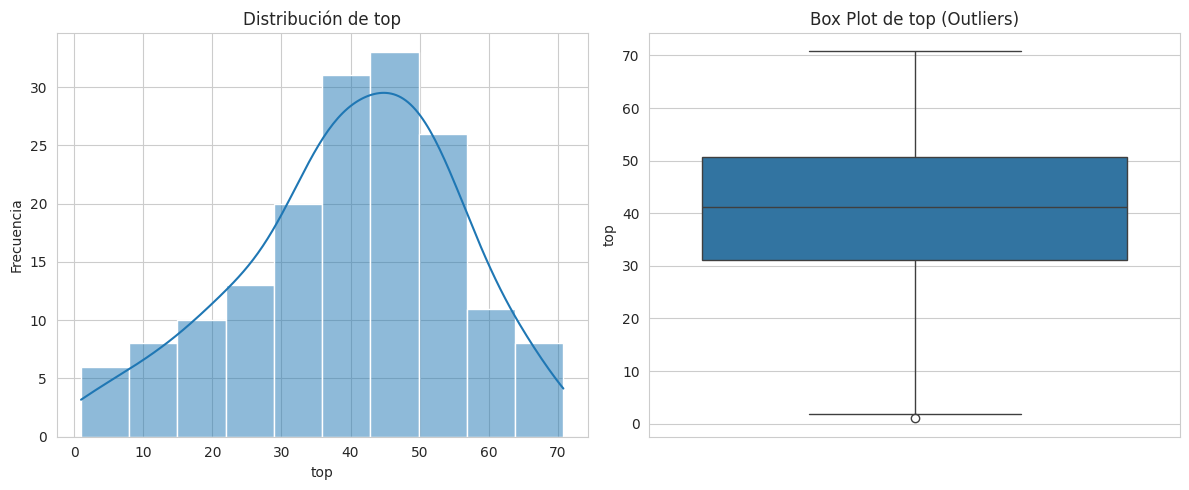

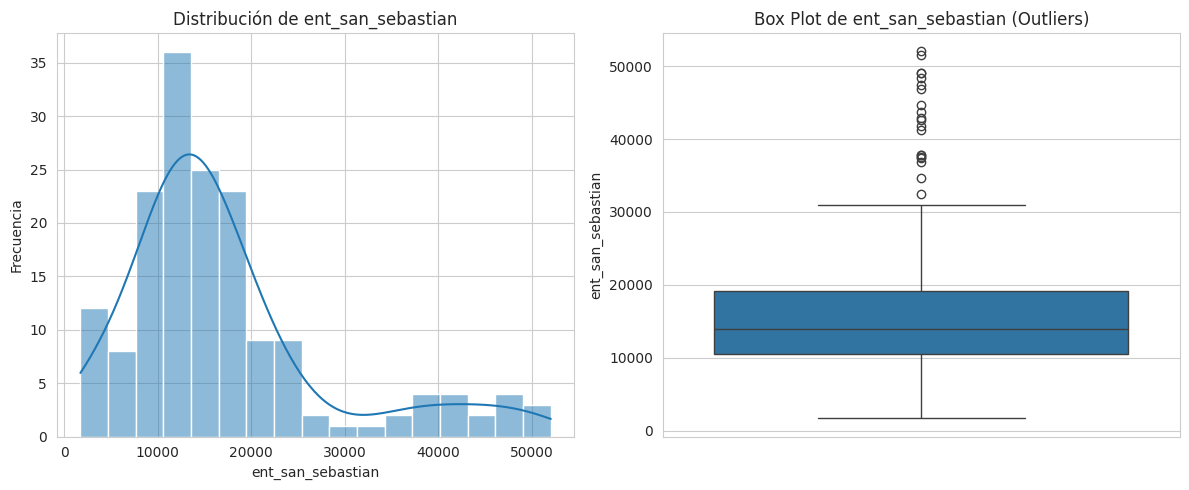

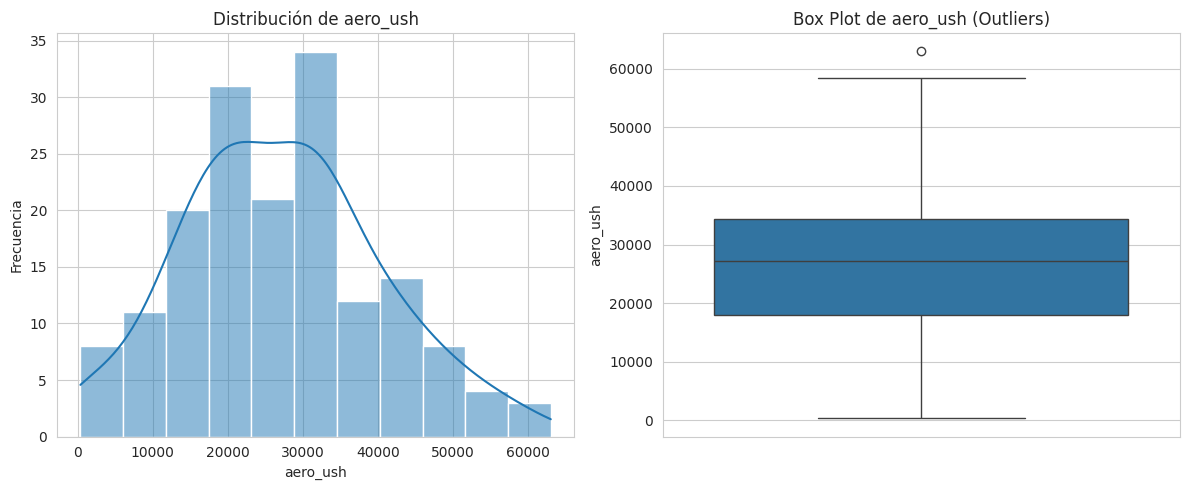

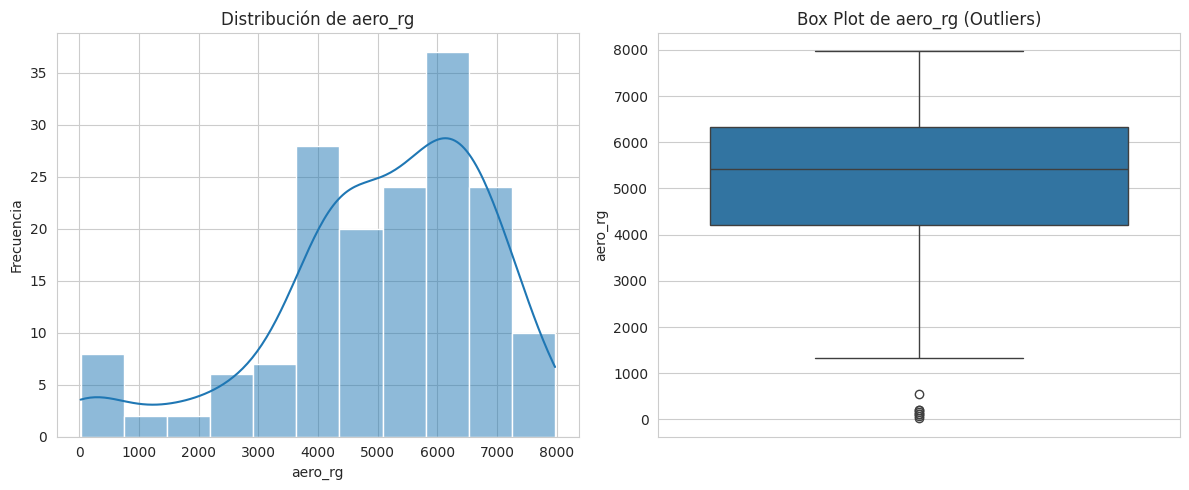


**2.4 Matriz de Correlación entre Variables Numéricas:**


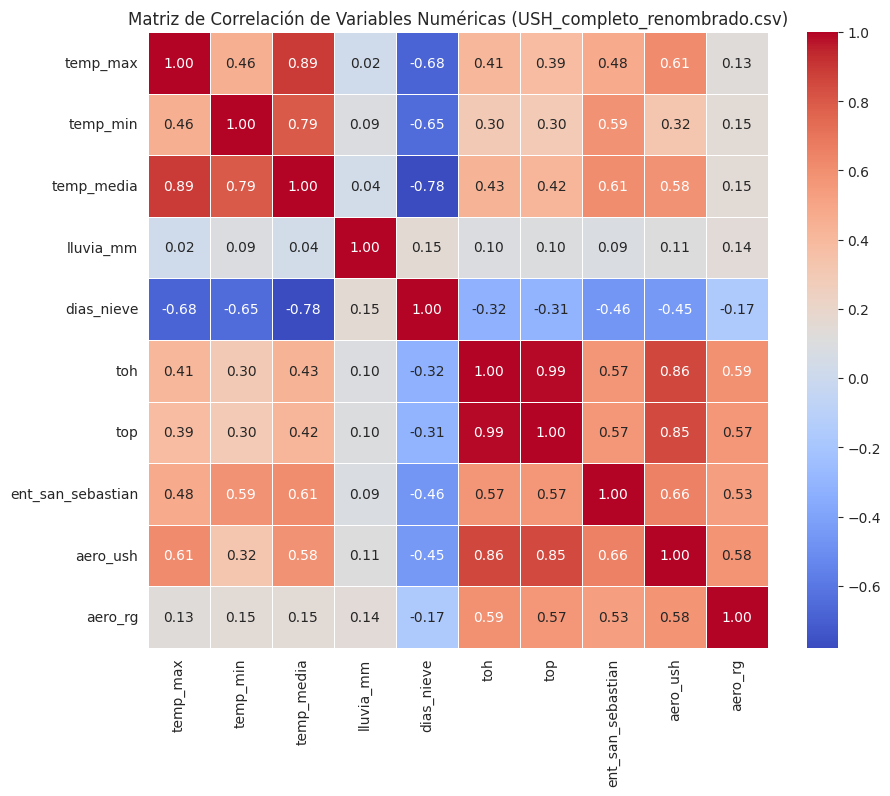


--- EDA COMPLETADO PARA AMBOS DATASETS ---

**Próximos pasos sugeridos:**
- **Manejo de valores nulos:** Decide la estrategia para 'aero_ush' (imputación, eliminación, etc.).
- **Análisis de outliers:** Investiga los valores atípicos identificados en los box plots. ¿Son errores o datos válidos extremos?
- **Ingeniería de características:** Si es necesario, crea nuevas variables que puedan ser útiles para tu análisis o modelo (ej. promedios móviles, diferencias inter-anuales).
- **Análisis de series de tiempo:** Dado que cada registro es un mes y tienes una columna de 'anio', considera visualizar las variables clave a lo largo del tiempo para identificar tendencias o patrones estacionales.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 5) # Ajustamos el tamaño para mejor visualización

# --- PASO 1: Cargar los datasets ---
# Asegúrate de que los archivos estén subidos a Colab o que la ruta sea correcta si usas Google Drive
try:
    df_rg = pd.read_csv('RG_completo_renombrado.csv')
    df_ush = pd.read_csv('USH_completo_renombrado.csv')
    print("Archivos cargados exitosamente.")
except FileNotFoundError:
    print("Error: Asegúrate de haber subido los archivos CSV o de que las rutas sean correctas.")
    exit()

# --- Análisis Exploratorio de Datos (EDA) para RG_completo_renombrado.csv ---
print("\n" + "="*50)
print("--- ANÁLISIS EXPLORATORIO DE DATOS (EDA) para RG_completo_renombrado.csv ---")
print("="*50)

# 1.1 Información general y vista rápida
print("\n**1.1 Información General y Primeras Filas:**")
print("Primeras 5 filas del dataset:")
print(df_rg.head())
print("\nInformación de las columnas y tipos de datos:")
df_rg.info()
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(df_rg.describe()) # Solo columnas numéricas por defecto

# 1.2 Manejo de valores nulos
print("\n**1.2 Valores Nulos:**")
null_counts = df_rg.isnull().sum()
null_percentages = (df_rg.isnull().sum() / len(df_rg)) * 100
null_info = pd.DataFrame({'Conteo de Nulos': null_counts, 'Porcentaje de Nulos (%)': null_percentages})
print(null_info[null_info['Conteo de Nulos'] > 0])

# Imputación sugerida para 'aero_ush' (si es apropiado, aquí se muestra un ejemplo con la media)
if 'aero_ush' in df_rg.columns and df_rg['aero_ush'].isnull().any():
    print(f"\nLa columna 'aero_ush' tiene nulos. Se recomienda considerar su imputación.")
    # Ejemplo de imputación con la media (descomentar para aplicar)
    # df_rg['aero_ush'].fillna(df_rg['aero_ush'].mean(), inplace=True)
    # print(f"Nulos en 'aero_ush' después de imputación (ejemplo): {df_rg['aero_ush'].isnull().sum()}")


# 1.3 Distribución y Outliers de Variables Clave Numéricas
print("\n**1.3 Distribución y Detección de Outliers en Variables Clave:**")
# Excluimos 'anio' y las columnas 'mes_' booleanas
numeric_cols_to_plot_rg = df_rg.select_dtypes(include=np.number).columns.drop(['anio'])
# Filtramos las columnas 'mes_' que son booleanas pero pueden ser interpretadas como numéricas (0/1)
numeric_cols_to_plot_rg = [col for col in numeric_cols_to_plot_rg if not col.startswith('mes_')]

if numeric_cols_to_plot_rg:
    for col in numeric_cols_to_plot_rg:
        plt.figure(figsize=(12, 5))
        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(df_rg[col].dropna(), kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_rg[col].dropna())
        plt.title(f'Box Plot de {col} (Outliers)')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
else:
    print("No hay columnas numéricas adecuadas para visualizar en RG_completo_renombrado.csv.")

# 1.4 Matriz de Correlación
print("\n**1.4 Matriz de Correlación entre Variables Numéricas:**")
# Calculamos la correlación solo para las columnas numéricas relevantes
if numeric_cols_to_plot_rg and len(numeric_cols_to_plot_rg) >= 2:
    corr_matrix_rg = df_rg[numeric_cols_to_plot_rg].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix_rg, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación de Variables Numéricas (RG_completo_renombrado.csv)')
    plt.show()
else:
    print("No hay suficientes columnas numéricas para generar una matriz de correlación en RG_completo_renombrado.csv.")

# --- Análisis Exploratorio de Datos (EDA) para USH_completo_renombrado.csv ---
print("\n" + "="*50)
print("--- ANÁLISIS EXPLORATORIO DE DATOS (EDA) para USH_completo_renombrado.csv ---")
print("="*50)

# 2.1 Información general y vista rápida
print("\n**2.1 Información General y Primeras Filas:**")
print("Primeras 5 filas del dataset:")
print(df_ush.head())
print("\nInformación de las columnas y tipos de datos:")
df_ush.info()
print("\nEstadísticas descriptivas de las columnas numéricas:")
print(df_ush.describe())

# 2.2 Manejo de valores nulos
print("\n**2.2 Valores Nulos:**")
null_counts_ush = df_ush.isnull().sum()
null_percentages_ush = (df_ush.isnull().sum() / len(df_ush)) * 100
null_info_ush = pd.DataFrame({'Conteo de Nulos': null_counts_ush, 'Porcentaje de Nulos (%)': null_percentages_ush})
print(null_info_ush[null_info_ush['Conteo de Nulos'] > 0])

# 2.3 Distribución y Outliers de Variables Clave Numéricas
print("\n**2.3 Distribución y Detección de Outliers en Variables Clave:**")
numeric_cols_to_plot_ush = df_ush.select_dtypes(include=np.number).columns.drop(['anio'])
numeric_cols_to_plot_ush = [col for col in numeric_cols_to_plot_ush if not col.startswith('mes_')] # Por si USH también tiene meses

if numeric_cols_to_plot_ush:
    for col in numeric_cols_to_plot_ush:
        plt.figure(figsize=(12, 5))
        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(df_ush[col].dropna(), kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_ush[col].dropna())
        plt.title(f'Box Plot de {col} (Outliers)')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
else:
    print("No hay columnas numéricas adecuadas para visualizar en USH_completo_renombrado.csv.")

# 2.4 Matriz de Correlación
print("\n**2.4 Matriz de Correlación entre Variables Numéricas:**")
if numeric_cols_to_plot_ush and len(numeric_cols_to_plot_ush) >= 2:
    corr_matrix_ush = df_ush[numeric_cols_to_plot_ush].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix_ush, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación de Variables Numéricas (USH_completo_renombrado.csv)')
    plt.show()
else:
    print("No hay suficientes columnas numéricas para generar una matriz de correlación en USH_completo_renombrado.csv.")

print("\n" + "="*50)
print("--- EDA COMPLETADO PARA AMBOS DATASETS ---")
print("="*50)
